In [3]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sb

In [4]:
data=pd.read_csv("../Datasets/Cardiotocographic.csv")

In [5]:
data

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


 1] HANDELLING MISSING DATA & FILLING NAN VALUES

In [7]:
data.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [8]:
data.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [9]:
data=data.fillna(0)
data.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [10]:
data.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')

In [11]:
data.rename(columns={
    'LB': 'Baseline_FHR',
    'AC': 'Accelerations',
    'FM': 'Fetal_Movements',
    'UC': 'Uterine_Contractions',
    'DL': 'Light_Decelerations',
    'DS': 'Severe_Decelerations',
    'DP': 'Prolonged_Decelerations',
    'ASTV': 'Abn_Short_Term_Var',
    'MSTV': 'Mean_Short_Term_Var',
    'ALTV': 'Abn_Long_Term_Var',
    'MLTV': 'Mean_Long_Term_Var',
    'Width': 'Histogram_Width',
    'Tendency': 'Trend_Tendency',
    'NSP': 'Fetal_State'
}, inplace=True)

In [12]:
print(data.columns)

Index(['Baseline_FHR', 'Accelerations', 'Fetal_Movements',
       'Uterine_Contractions', 'Light_Decelerations', 'Severe_Decelerations',
       'Prolonged_Decelerations', 'Abn_Short_Term_Var', 'Mean_Short_Term_Var',
       'Abn_Long_Term_Var', 'Mean_Long_Term_Var', 'Histogram_Width',
       'Trend_Tendency', 'Fetal_State'],
      dtype='object')


In [13]:
data

,Baseline_FHR,Accelerations,Fetal_Movements,Uterine_Contractions,Light_Decelerations,Severe_Decelerations,Prolonged_Decelerations,Abn_Short_Term_Var,Mean_Short_Term_Var,Abn_Long_Term_Var,Mean_Long_Term_Var,Histogram_Width,Trend_Tendency,Fetal_State
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Baseline_FHR             2126 non-null   float64
 1   Accelerations            2126 non-null   float64
 2   Fetal_Movements          2126 non-null   float64
 3   Uterine_Contractions     2126 non-null   float64
 4   Light_Decelerations      2126 non-null   float64
 5   Severe_Decelerations     2126 non-null   float64
 6   Prolonged_Decelerations  2126 non-null   float64
 7   Abn_Short_Term_Var       2126 non-null   float64
 8   Mean_Short_Term_Var      2126 non-null   float64
 9   Abn_Long_Term_Var        2126 non-null   float64
 10  Mean_Long_Term_Var       2126 non-null   float64
 11  Histogram_Width          2126 non-null   float64
 12  Trend_Tendency           2126 non-null   float64
 13  Fetal_State              2126 non-null   float64
dtypes: float64(14)
memory us

# 2] ANALYSE DESCRIPTIVE STATISTICS

In [16]:
data.describe()

,Baseline_FHR,Accelerations,Fetal_Movements,Uterine_Contractions,Light_Decelerations,Severe_Decelerations,Prolonged_Decelerations,Abn_Short_Term_Var,Mean_Short_Term_Var,Abn_Long_Term_Var,Mean_Long_Term_Var,Histogram_Width,Trend_Tendency,Fetal_State
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,132.026470,0.003189,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.203052,69.733581,0.313246,1.291622
std,17.312967,0.004381,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.777652,43.283505,0.643186,0.654277
min,0.000000,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.500000,36.000000,0.000000,1.000000
50%,133.000000,0.001572,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


**Mean and Median**: To understand central tendencies.  
**Standard Deviation (std)**: To check variability.  
**Min and Max**: To identify outliers or abnormal values.

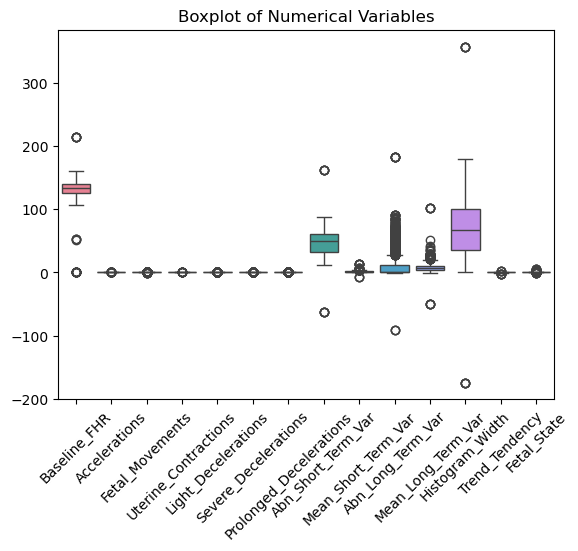

In [18]:

sb.boxplot(data=data)
plt.xticks(rotation=45) 
plt.title("Boxplot of Numerical Variables")
plt.show()


Text(0.5, 1.0, 'Heart Rate of Fetus')

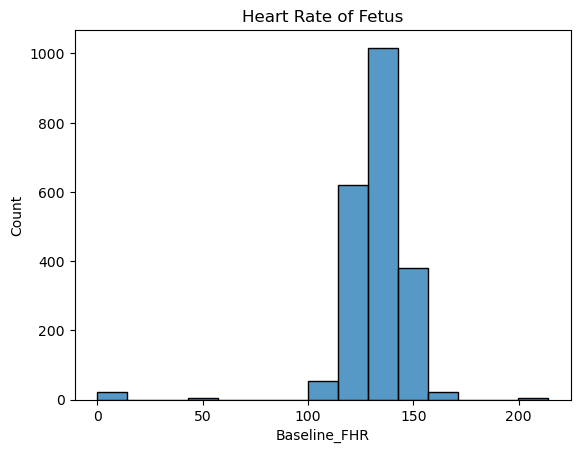

In [19]:
sb.histplot(data.Baseline_FHR, bins=15)
plt.title("Heart Rate of Fetus")

**The above histplot show the frequency distribution of baseline Fetal Heart Rate.**  
**If the mean is outside the normal range (110-160 bpm), it indicate overall fetal stress or abnormality in the monitored population.**

# 3] DATA VISUALIZATION

● Histograms to visualize the distributions of various numerical variables.

Text(0.5, 1.0, 'COUNT OF FETAL BY MEAN SHORT TERM VAR ')

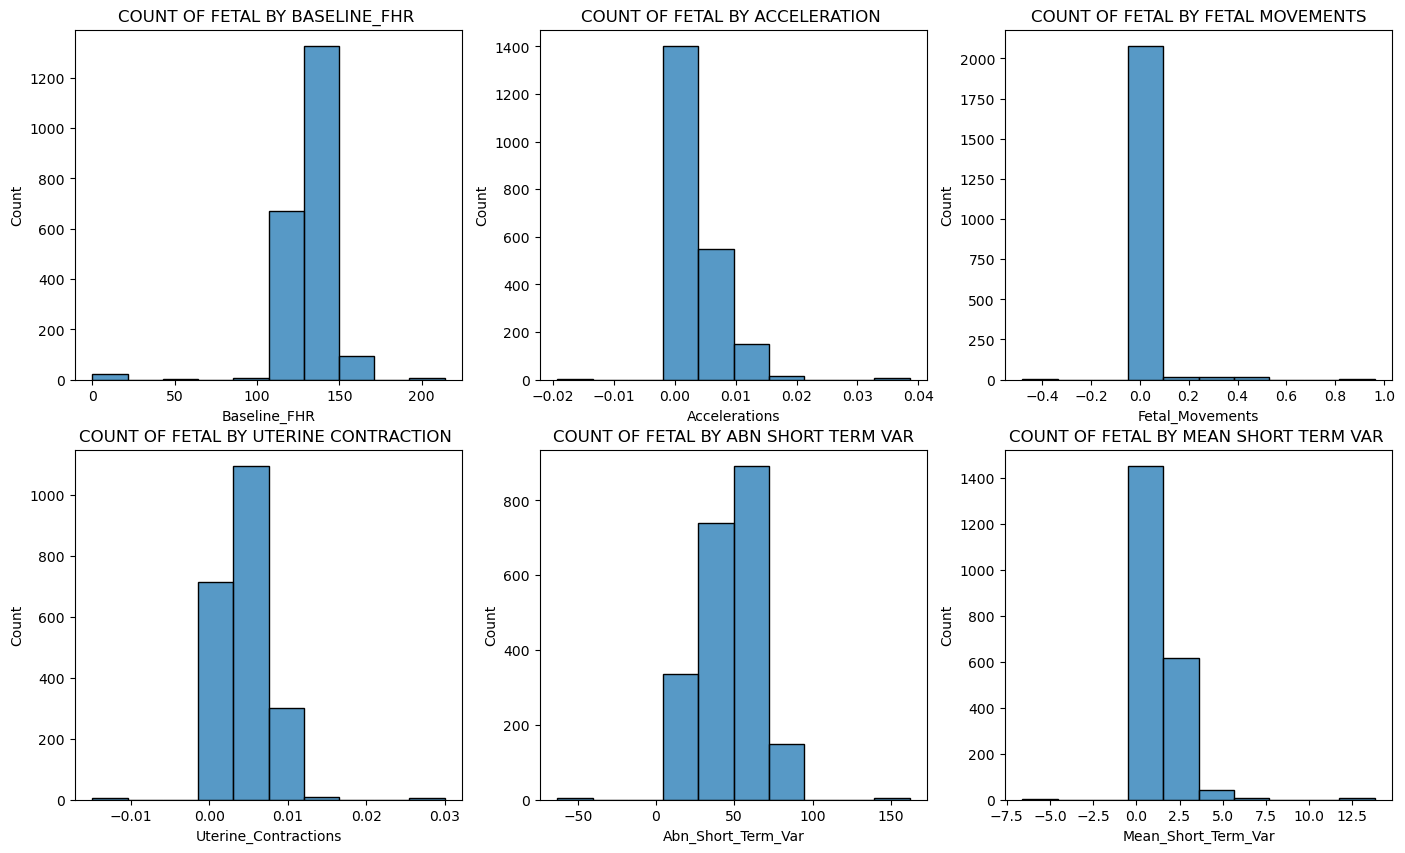

In [35]:
fig=plt.figure(figsize=[17,10])
a1=fig.add_subplot(231)
sb.histplot(data.Baseline_FHR, bins=10)
plt.title("COUNT OF FETAL BY BASELINE_FHR ")

a1=fig.add_subplot(232)
sb.histplot(data.Accelerations, bins=10)
plt.title("COUNT OF FETAL BY ACCELERATION ")
a1=fig.add_subplot(233)
sb.histplot(data.Fetal_Movements, bins=10)
plt.title("COUNT OF FETAL BY FETAL MOVEMENTS")
a1=fig.add_subplot(234)
sb.histplot(data.Uterine_Contractions, bins=10)
plt.title("COUNT OF FETAL BY UTERINE CONTRACTION ")
a1=fig.add_subplot(235)
sb.histplot(data.Abn_Short_Term_Var, bins=10)
plt.title("COUNT OF FETAL BY ABN SHORT TERM VAR")
a1=fig.add_subplot(236)
sb.histplot(data.Mean_Short_Term_Var, bins=10)
plt.title("COUNT OF FETAL BY MEAN SHORT TERM VAR ")


Text(0.5, 1.0, 'COUNT OF FETAL BY FETAL STATE CLASS')

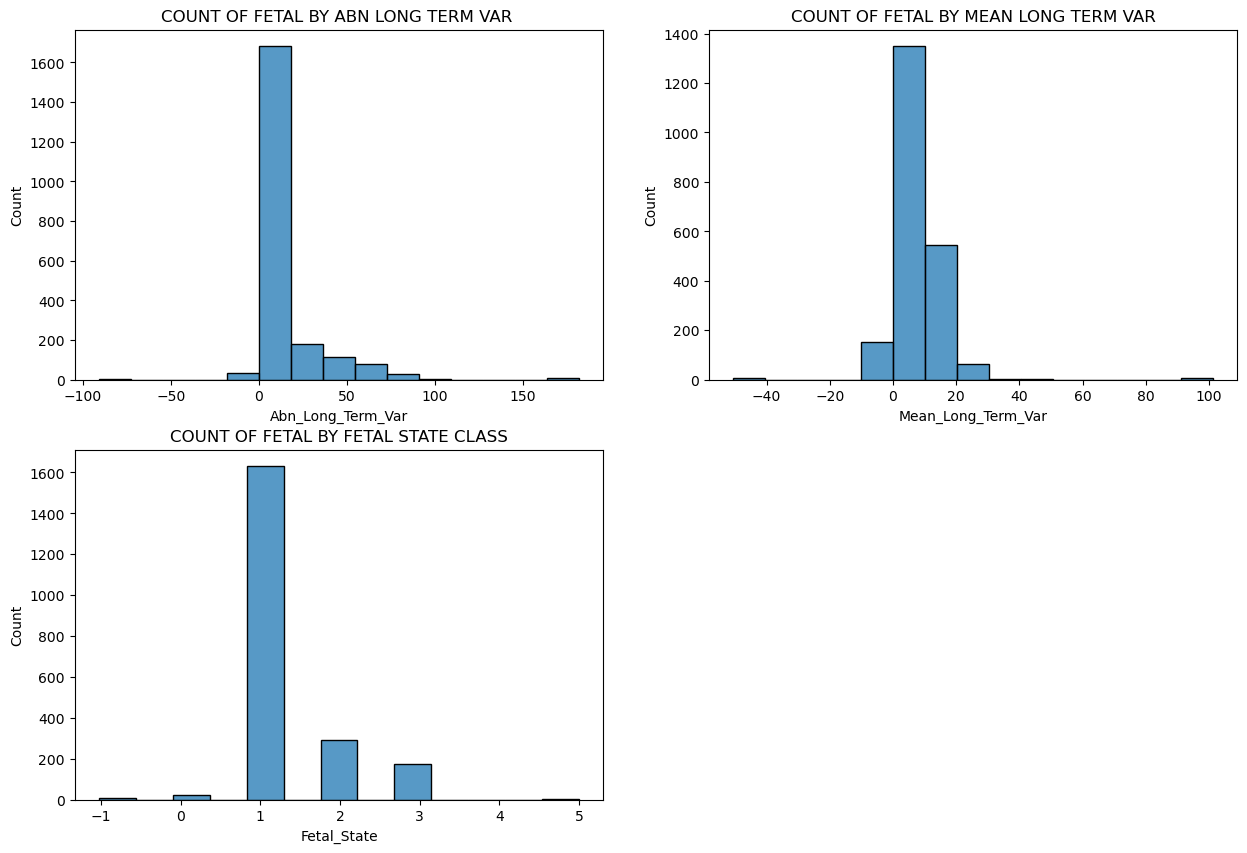

In [36]:
fig=plt.figure(figsize=[15,10])
a1=fig.add_subplot(221)
sb.histplot(data.Abn_Long_Term_Var, bins=15)
plt.title("COUNT OF FETAL BY ABN LONG TERM VAR ")
a1=fig.add_subplot(222)
sb.histplot(data.Mean_Long_Term_Var	, bins=15)
plt.title("COUNT OF FETAL BY MEAN LONG TERM VAR")
a1=fig.add_subplot(223)
sb.histplot(data.Fetal_State)
plt.title("COUNT OF FETAL BY FETAL STATE CLASS")


**Above Histogram shows the distribution of values for each variables.  
It Shows How Number of Fetus Affect By (Baseline_FHR, Acceleration, Fetal_Movements) ETC.**

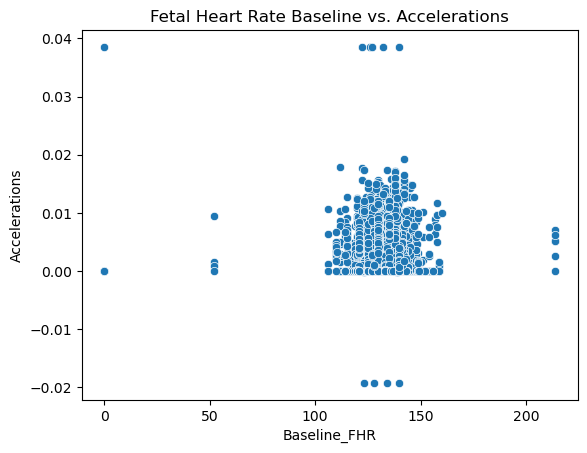

In [39]:
sb.scatterplot(data, x="Baseline_FHR", y='Accelerations')
plt.title('Fetal Heart Rate Baseline vs. Accelerations')
plt.show()

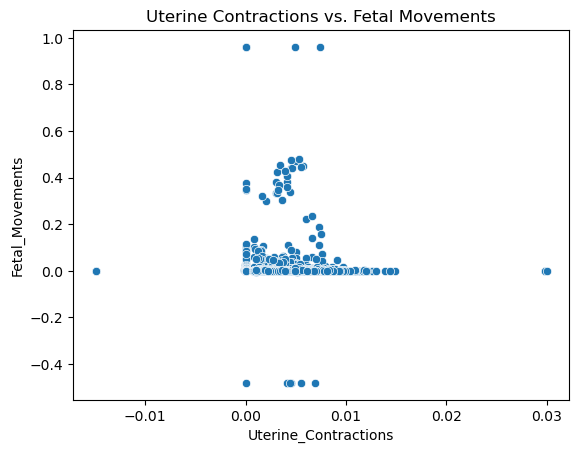

In [52]:

sb.scatterplot(data, x='Uterine_Contractions', y='Fetal_Movements')
plt.title('Uterine Contractions vs. Fetal Movements')
plt.show()

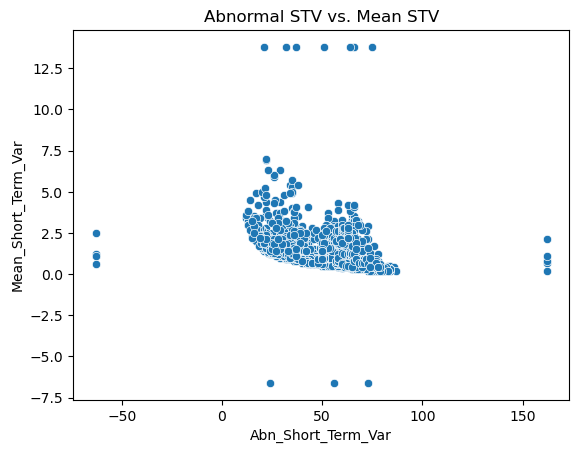

In [42]:

sb.scatterplot(data, x='Abn_Short_Term_Var', y='Mean_Short_Term_Var')
plt.title('Abnormal STV vs. Mean STV')
plt.show()

**Scatter plots help visualize relationships between pairs of numeric variables.    
1)If the points trend upward (left to right), the relationship is positive.  
2)If the points trend downward, the relationship is negative.  
3)If the points are randomly scattered, there is no correlation**

In [56]:
def categ_fetal_state(value):
    if value==1:
        return "normal"
    elif value==2:
        return "Suspicious"
    elif value==3:
        return"Pathological"
    else:
        return "uncknown"


In [66]:
data['categ_fetal_state']=data['Fetal_State'].apply(categ_fetal_state)

In [68]:
data

,Baseline_FHR,Accelerations,Fetal_Movements,Uterine_Contractions,Light_Decelerations,Severe_Decelerations,Prolonged_Decelerations,Abn_Short_Term_Var,Mean_Short_Term_Var,Abn_Long_Term_Var,Mean_Long_Term_Var,Histogram_Width,Trend_Tendency,Fetal_State,categ_fetal_state
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000,Suspicious
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000,normal
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000,normal
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000,normal
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000,Suspicious
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000,Suspicious
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464,uncknown
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000,Suspicious


In [70]:
a=data.groupby('categ_fetal_state')["Baseline_FHR"].mean()

In [74]:
a

categ_fetal_state
Pathological    131.883272
Suspicious      141.819989
normal          131.919815
uncknown        113.248438
Name: Baseline_FHR, dtype: float64

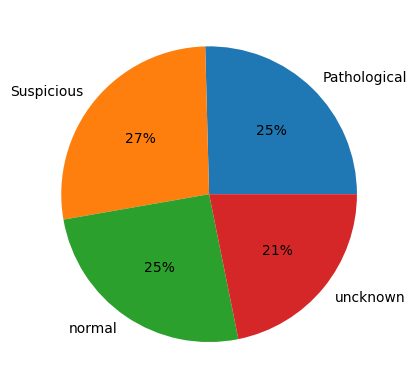

In [77]:
plt.pie(a.values,labels=a.index,autopct='%d%%')
plt.show()

# CORRELATION HEATMAP

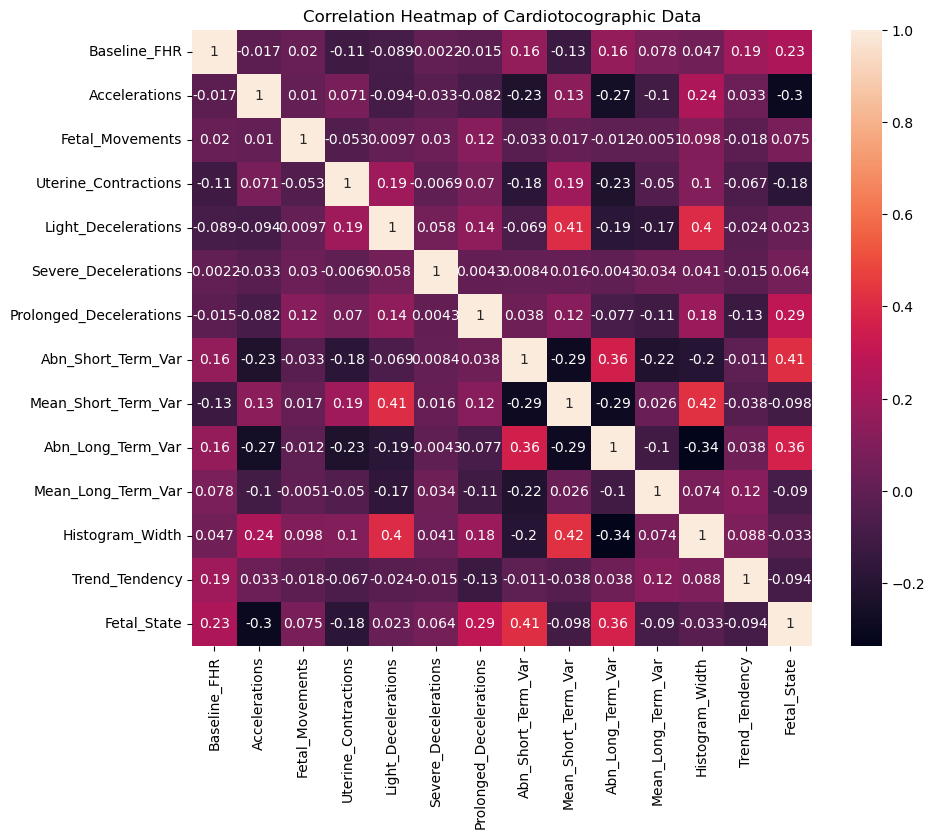

In [45]:
correlation=data.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap of Cardiotocographic Data')
plt.show()

**● Heatmap Shows pairwise correlations between variables.  
● Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation).  
● High positive correlations may indicate direct relationships, while high negative correlations indicate inverse relationships.**  
**●Positive correlation (close to +1):** When one variable increases, the other also increases.  
**●Negative correlation (close to -1):** When one variable increases, the other decreases.  
**●No correlation (around 0):** No linear relationship between the variables.

**Interpretation of Correlations and Potential Implications :**

**1)Strong Positive Correlations:**  

**●MSTV (Mean Short-Term Variability) and MLTV (Mean Long-Term Variability):**  
●A strong relationship indicates that mean variations in fetal heart rate across short and long terms are interconnected.  
●Clinical implication: Variability patterns help assess fetal autonomic nervous system function.  

**2)Strong Negative Correlations:**  

**●Fetal Heart Rate Baseline (LB) and Mean Short-Term Variability (MSTV):**  
●If LB increases, MSTV tends to decrease. 
●Clinical implication: A persistently high baseline fetal heart rate with reduced variability may indicate fetal distress or hypoxia.  

**3)Moderate Correlations:**

**●Deceleration Width (Width) and Severe Decelerations (DS):**    
●Wider decelerations are moderately associated with more severe decelerations.  
●Clinical implication: Prolonged and wide decelerations may indicate serious fetal distress.
